<a href="https://colab.research.google.com/github/Kuriajm/Week_7_Core_IP/blob/main/Moringa_School_Data_Science_Core_IP_Wk_7_Mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Business understanding**

**1.1 Define the question**

Hass Consulting Company which is a real estate leader with over 25 years of experience. 

   **Tasks** 

1. To study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

2.  create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**1.2 Metric for success**

A model that is able to predict  the sale prices of HAss Consulting company with a accuracy of between 60% to 98%

**1.3 Context**

We are working with the data provided and all the limitations that comes with it. 

**1.4 Experimental design**

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.

5. Performing regression analysis.

6. Incorporate categorical independent variables into your models.

7. Check for multicollinearity.

8. Provide a recommendation based on your analysis. 

9. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

10. Challenge your solution by providing insights on how you can make improvements in model improvement.


##**2. Data understanding**

**2.1 Prelimineries**

In [91]:
!pip install hvplot

In [92]:
##Importing the datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
import hvplot.pandas

**2.2 Loading the dataset**

In [93]:
hassdf = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
print(hassdf.head())

           id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]


**2.3 Exploring the dataset**

In [94]:
##Checking the shape

print("Our dataset has ", hassdf.shape, '( 21613 rows and 20 columns )')



Our dataset has  (21613, 20) ( 21613 rows and 20 columns )


In [95]:
##Checking the columns

print(hassdf.columns)

##Description of the dataset

print(hassdf.describe())

##Checking the information of the dataset

print(hassdf.info())

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
                 id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 t

**2.4 Define the appropriateness of the available data to answer the given question**

As we can see, this dataset has 20 columns and 21613 rows. 

The dataset is either float or intergers meaning we will need to do very little for it to be ready for modelling.

The Data is appropriate as it gives factors that Hass Consulting uses to price its housing.

##**3. Data preparation**

**3.1 Cleaning the data**

In [96]:
#Check for null values

print(hassdf.isnull().sum())
print('***')
print('Our Data has no null values')

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
***
Our Data has no null values


In [97]:
#Lets drop unneccessary columns (That is ID, Lat and Long)

hassdf.drop(['id', 'lat','long'],axis=1,inplace=True)
hassdf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [98]:
#Here i want to add a column for the years it took for the building to be rennovated since its construction. I believe this affects the price of the house so much
hassdf['yrs_to_renovation'] = hassdf['yr_renovated'] - hassdf['yr_built']
hassdf['yrs_to_renovation'] = np.where(hassdf['yrs_to_renovation'] < 0, 0,hassdf['yrs_to_renovation'])

#Then drop year renovated and year vuilt as we wont use them anymore
hassdf.drop(['yr_renovated', 'yr_built'],axis=1,inplace=True)
hassdf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,yrs_to_renovation
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,40
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,0


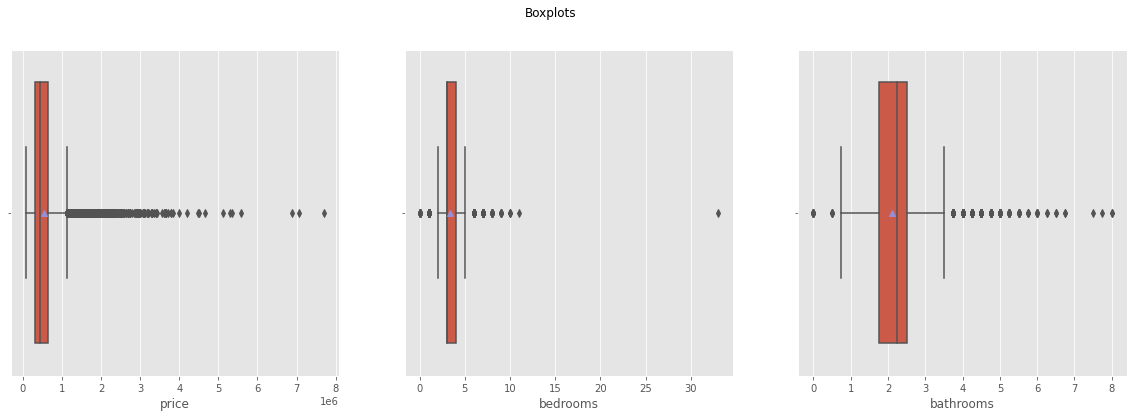

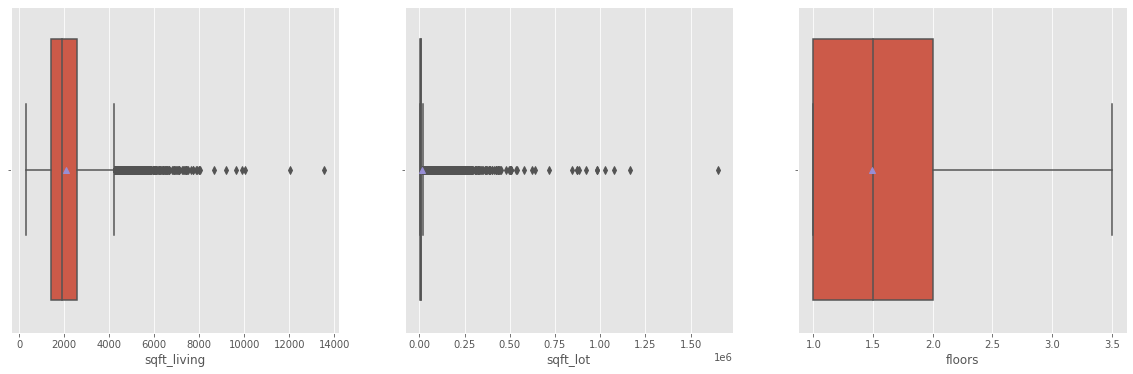

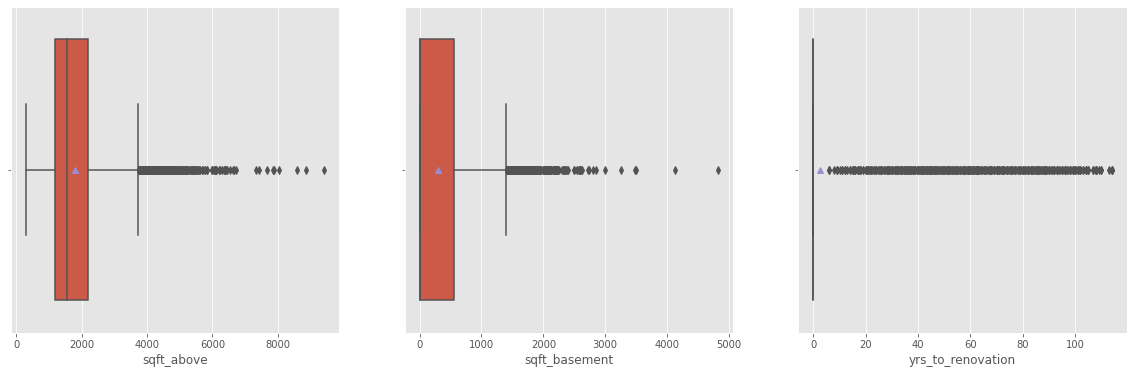

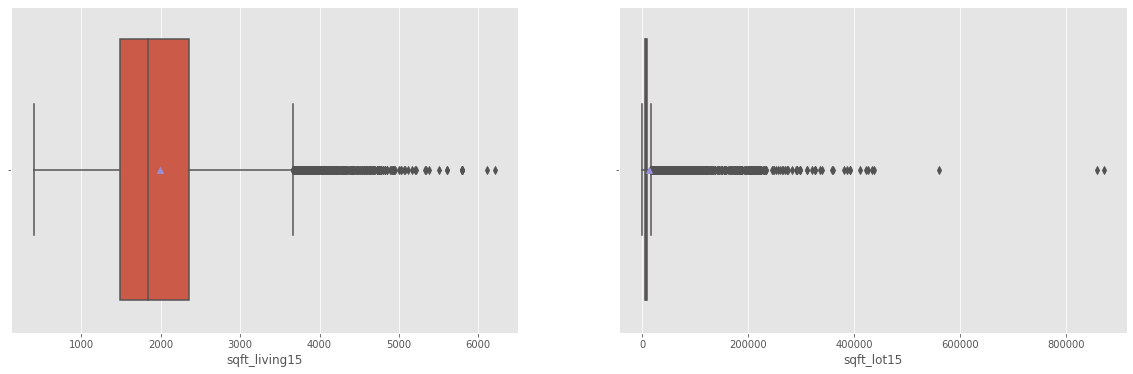

In [99]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = hassdf['price'], ax=ax1, showmeans = True)
sns.boxplot(x = hassdf['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = hassdf['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x =hassdf['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = hassdf['sqft_lot'], ax=ax5, showmeans = True)
sns.boxplot(x = hassdf['floors'], ax=ax6, showmeans = True)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x =hassdf['sqft_above'], ax=ax7, showmeans = True)
sns.boxplot(x =hassdf['sqft_basement'], ax=ax8, showmeans = True)
sns.boxplot(x =hassdf['yrs_to_renovation'], ax=ax9, showmeans = True)

fig, (ax10,ax11) = plt.subplots(1,2, figsize=(20, 6))
sns.boxplot(x =hassdf['sqft_living15'], ax=ax10, showmeans = True)
sns.boxplot(x =hassdf['sqft_lot15'], ax=ax11, showmeans = True)

plt.show()

As you can see the outliers here exists in a few features and the only represent the uniqueness of the data therefore we can work with them as they wont affect our data.

##**4.0 Data Analysis**

**4.1 Univariate Analysis**

In [100]:
#Here lets get a summary of each feature by checking measures of central tendancy, counts, percentiles, min, max, skew and Kurtosis

# Ploting the univariate summaries and recording our observations
def summaries_uni(df):
  out_df = pd.DataFrame(columns=['Count',  'Unique', 'Mode', 'Mean','Median', 'Min','Max','25%',  '75%',  'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]

    else:
     out_df.loc[col] = [df[col].count(),  df[col].nunique(),df[col].mode.values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return out_df

summaries_uni(hassdf)

,Count,Unique,Mode,Mean,Median,Min,Max,25%,75%,Std_dev,Skew,Kurt
price,21613.0,3625.0,350000.0,540182.158793,75000.0,321950.00,450000.00,645000.0,7700000.0,367362.231718,4.021716,34.522444
bedrooms,21613.0,13.0,3.0,3.370842,0.0,3.00,3.00,4.0,33.0,0.930062,1.974300,49.063653
bathrooms,21613.0,30.0,2.5,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163,0.511108,1.279902
sqft_living,21613.0,1038.0,1300.0,2079.899736,290.0,1427.00,1910.00,2550.0,13540.0,918.440897,1.471555,5.243093
sqft_lot,21613.0,9782.0,5000.0,15106.967566,520.0,5040.00,7618.00,10688.0,1651359.0,41420.511515,13.060019,285.077820
floors,21613.0,6.0,1.0,1.494309,1.0,1.00,1.50,2.0,3.5,0.539989,0.616177,-0.484723
waterfront,21613.0,2.0,0.0,0.007542,0.0,0.00,0.00,0.0,1.0,0.086517,11.385108,127.632494
view,21613.0,5.0,0.0,0.234303,0.0,0.00,0.00,0.0,4.0,0.766318,3.395750,10.893022
condition,21613.0,5.0,3.0,3.409430,1.0,3.00,3.00,4.0,5.0,0.650743,1.032805,0.525764
grade,21613.0,12.0,7.0,7.656873,1.0,7.00,7.00,8.0,13.0,1.175459,0.771103,1.190932


In [101]:
#Count of no of bedrooms houses managed by Hass
print(hassdf.bedrooms.value_counts())

print()
print('Here we can say 3 bedrooms are the most popular houses and there is one 33 bedroomed house')

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Here we can say 3 bedrooms are the most popular houses and there is one 33 bedroomed house


90.2% of the houses do not have views


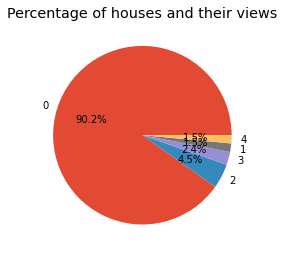

In [102]:
# Pie chat showing Percentage of houses and the number of their views


hassdf.view.value_counts().plot.pie(y = hassdf.view,figsize = (4, 6), autopct = '%1.1f%%',title = 'Percentage of houses and their views',label = '');

print('90.2% of the houses do not have views')
                  



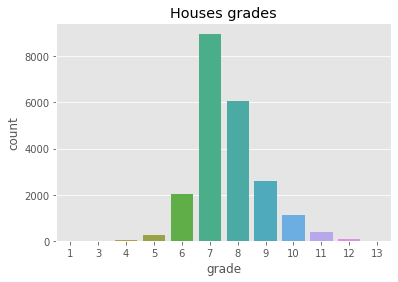

Grade 7 houses are the most popular


In [103]:
#Count plots
sns.countplot(x='grade',data=hassdf)
plt.title('Houses grades')
plt.show()


print('Grade 7 houses are the most popular')

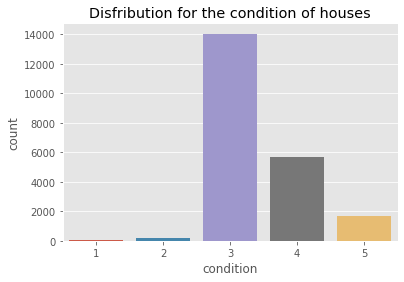

Most houses conditions are rated 3


In [104]:
#Count plots
sns.countplot(x='condition',data=hassdf)
plt.title('Disfribution for the condition of houses')
plt.show()

print('Most houses conditions are rated 3')

**4.2 Bivariate Analysis**

<Figure size 432x288 with 0 Axes>

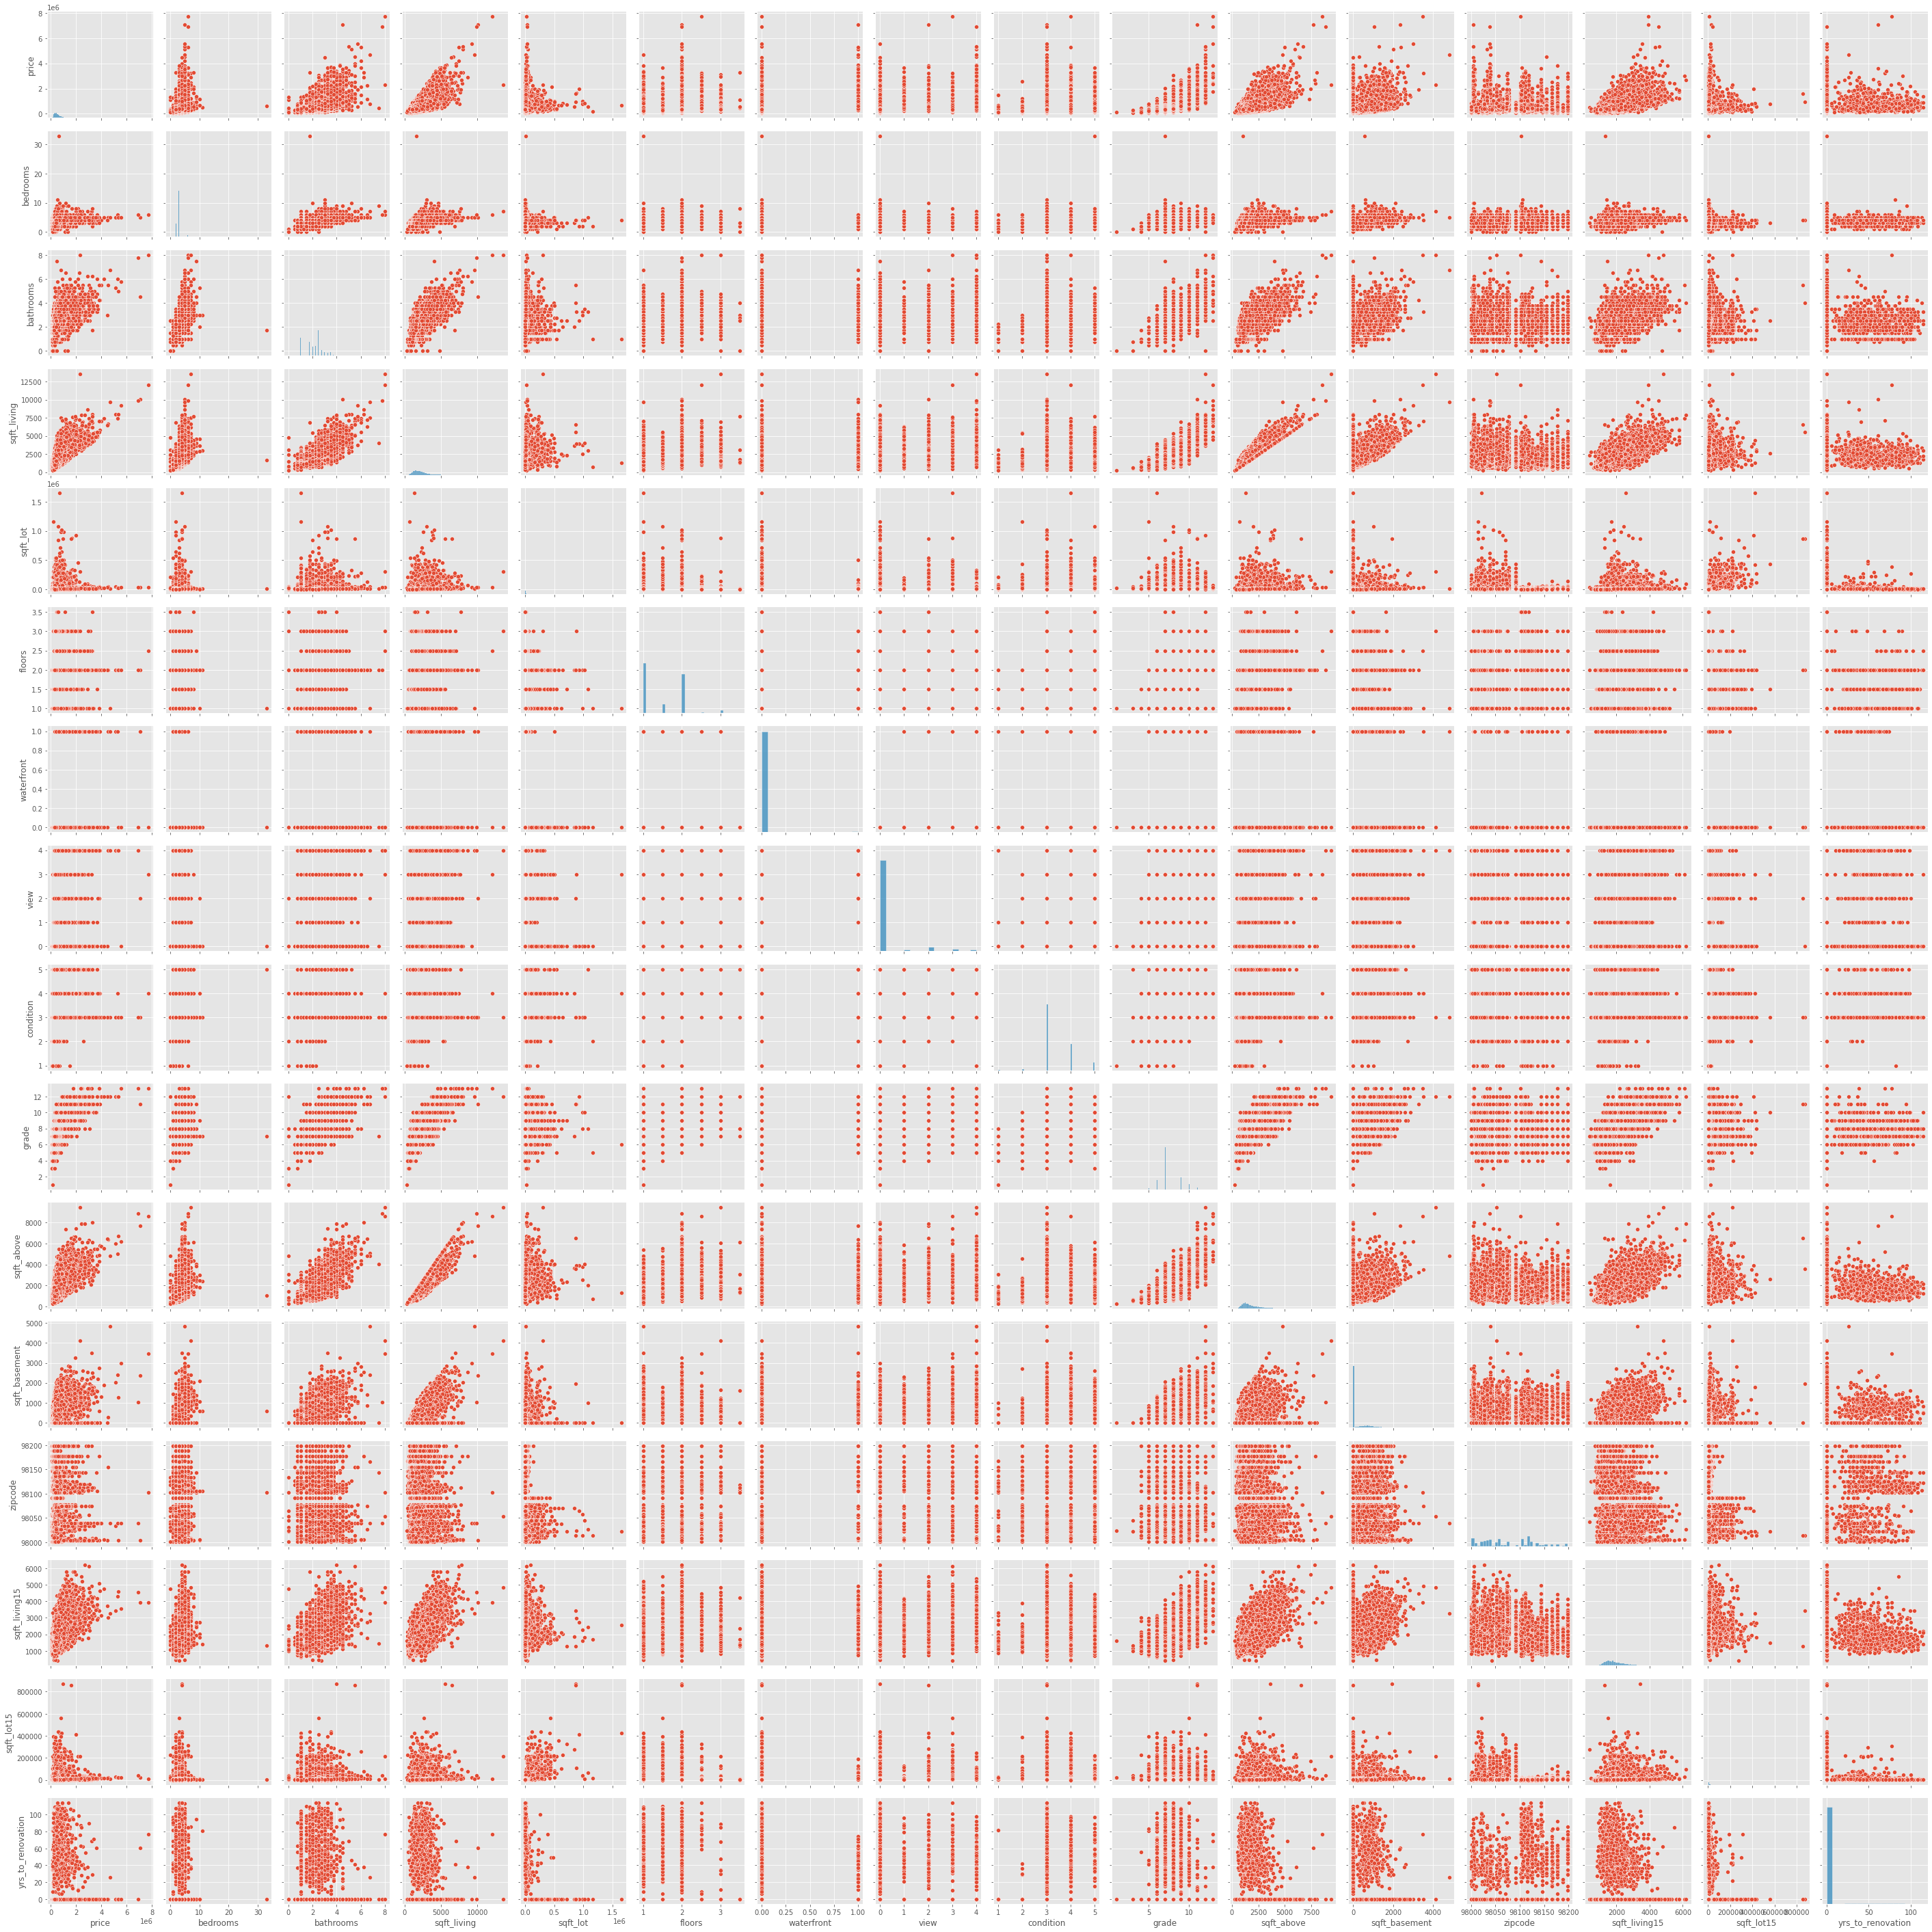

In [105]:
#Lets look at the pair plots

# Plot the pairplot
plt.figure()
sns.pairplot(hassdf)
plt.show()

There exists a very interesting co-relation especially between price and the squareft. 

**4.3 Multivariate Analysis**

In [106]:
#Correlations
hassdf.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,yrs_to_renovation
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,-0.053168,0.585374,0.082456,0.118124
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,0.019334
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,0.049395
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,0.045311
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,-0.002829
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,0.015068
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,0.060922
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,0.084434
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,-0.064873
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248,0.011751


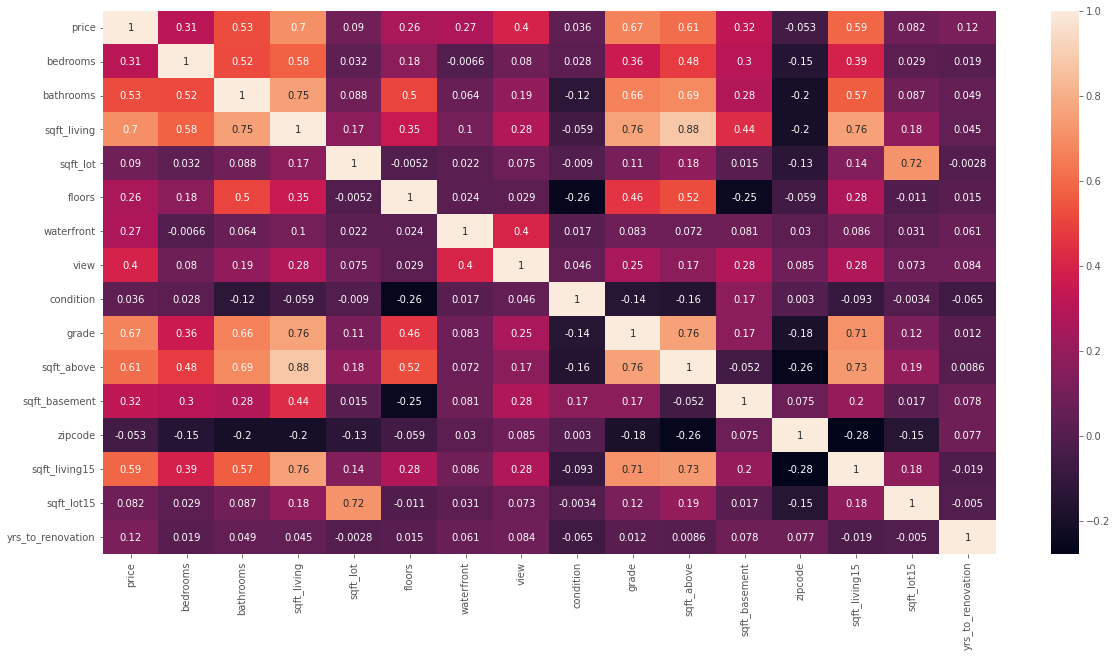

In [107]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(hassdf.corr(),annot=True)
plt.show()

From the map again, its very clear that price corelation with every feature and very stron corelations with  squareft above, bathrooms, bedrooms and even waterfront

In [108]:
#Lets save our dataset for modelling

hassdf1 = hassdf

##**5.0 Modeling**

**5.1 Multiple Linear Regression**

In [109]:
#Feature Engineering

#features  and label
X = hassdf1.drop('price', axis=1)
y = hassdf1['price']

print(X)
print(y)

       bedrooms  bathrooms  ...  sqft_lot15  yrs_to_renovation
0             3       1.00  ...        5650                  0
1             3       2.25  ...        7639                 40
2             2       1.00  ...        8062                  0
3             4       3.00  ...        5000                  0
4             3       2.00  ...        7503                  0
...         ...        ...  ...         ...                ...
21608         3       2.50  ...        1509                  0
21609         4       2.50  ...        7200                  0
21610         2       0.75  ...        2007                  0
21611         3       2.50  ...        1287                  0
21612         2       0.75  ...        1357                  0

[21613 rows x 15 columns]
0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length

In [110]:
#Splitting the data
#Now, we apply train-test split to divide the dataset into two parts, 
#one for training and another for testing. We will be using 25% of the data for testing. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(
    X_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    X_test.shape, y_test.shape))

Train data shape of X = (16209, 15) and Y = (16209,) : 
Test data shape of X = (5404, 15) and Y = (5404,) : 


In [111]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [113]:
# Apply multiple Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [114]:
#Let's evaluate the model by checking out it's coefficients and how we can interpret them.

# print the intercept
print(lin_reg.intercept_)


539274.7336664806


In [115]:
#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df = pd.DataFrame()
coeff_df['Features']= x_train.columns
coeff_df['coefficients'] = pd.Series(lin_reg.coef_)
coeff_df

,Features,coefficients
0,bedrooms,-32211.231303
1,bathrooms,-10884.913230
2,sqft_living,87635.928837
3,sqft_lot,3986.993875
4,floors,-2566.639568
5,waterfront,52325.617699
6,view,37421.027083
7,condition,38425.561468
8,grade,117696.033228
9,sqft_above,71006.335187




**>Interprating this coeficients as follows.**

Holding all other features fixed, 1 unit increase in bedrooms is associated with a decrease of $30858.968133 in price.... This can be applied to all other features







In [116]:
# Predictions from our Model
#Let's grab predictions off our test set and see how well it did!

pred = lin_reg.predict(X_test)


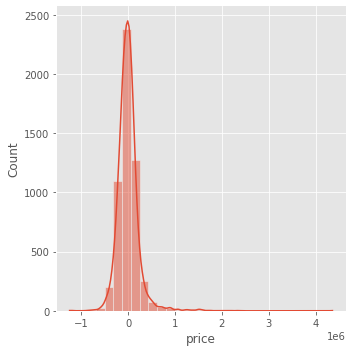

In [117]:
#Residual Plot distribution

sns.displot((y_test-pred), bins = 30, kde = True)
plt.show()



> Normal residual distribution. Very ok because of random chamces assumptions in Multiple linear regression



In [118]:
#Regression Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 151047.10343890937
MSE: 55656989609.69356
RMSE: 235917.336390723
R2 Square 0.6034661208849224
__________________________________
Train set evaluation:
_____________________________________
MAE: 147690.15180636125
MSE: 50309214364.93235
RMSE: 224297.15639065145
R2 Square 0.6221381454584667
__________________________________


In [119]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,151047.103439,5.565699e+10,235917.336391,0.603466,0.612248


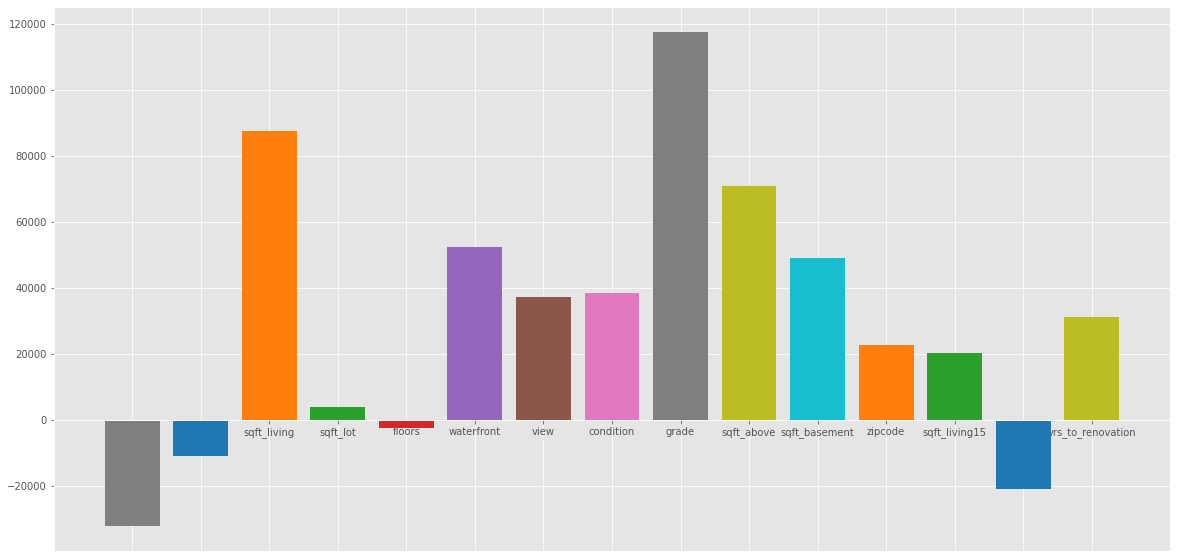

In [120]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(coeff_df['Features'],
coeff_df['coefficients'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

The major factors in Multiple linear regression for price are houses in Waterfront, view, condition and grade. Bedrooms, floors and bathroom are negative factors.

**4.2 Quantile Regression**

In [121]:
#Loading inputs and outputs
X = hassdf1.drop('price', axis=1)
y = hassdf1['price']

#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (16209, 15) and Y = (16209,) : 
Test data shape of X = (5404, 15) and Y = (5404,) : 


In [122]:
#scaling our features


from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
#X_train dataframe
df_x = pd.DataFrame(data=X_train, columns= X.columns )

#y_train into df and combine
ys = pd.Series(y_train, name="Price")
ys_df = ys.to_frame()
ys_df = ys_df.reset_index()
ys_df.drop('index', axis=1, inplace=True)
ys_df.head()

#Combining the X_train and y_train to create a Train Dataframe
df_train = pd.concat([df_x,ys_df], axis=1)
df_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,yrs_to_renovation,Price
0,-2.506436,-1.450046,-1.212549,0.607076,-0.918726,-0.089917,-0.307897,2.448915,-2.258231,-0.994890,-0.659256,-1.191864,-0.970507,0.273918,-0.193484,420850.0
1,-0.390401,-0.477529,-0.617729,-0.131147,-0.918726,-0.089917,-0.307897,-0.624125,-0.559724,-0.334529,-0.659256,-0.929932,-0.679629,-0.103177,2.048418,335000.0
2,-0.390401,0.170816,-0.444690,-0.209305,-0.918726,-0.089917,-0.307897,0.912395,0.289529,-0.142425,-0.659256,0.735205,0.207548,-0.212945,-0.193484,587100.0
3,-0.390401,-0.153356,0.625985,4.180530,-0.918726,-0.089917,-0.307897,0.912395,1.138782,1.046224,-0.659256,-1.042188,0.847479,1.122629,-0.193484,495000.0
4,-0.390401,-0.477529,-0.423061,-0.041783,-0.918726,-0.089917,-0.307897,0.912395,-0.559724,-0.118411,-0.659256,-0.705419,-0.054242,-0.086247,-0.193484,780000.0


In [124]:
#summary report of dataset at 0.5 Quantile
#Quatile regression

mod = smf.quantreg('Price ~ view + condition + grade + sqft_above + sqft_basement  + zipcode + sqft_living15 + sqft_lot15 + yrs_to_renovation', df_train)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.3491
Model:                       QuantReg   Bandwidth:                   2.904e+04
Method:                 Least Squares   Sparsity:                    3.969e+05
Date:                Sat, 27 Nov 2021   No. Observations:                16209
Time:                        16:04:44   Df Residuals:                    16199
                                        Df Model:                            9
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           5.13e+05   1558.744    329.097      0.000     5.1e+05    5.16e+05
view               4.555e+04   1703.563     26.740      0.000    4.22e+04    4.89e+04
condition          3.237e+04   1617.665     20.008      0.000    2.92e+04    3.55e+04
grade            

In [125]:
#Initiating test dataframe
df_xt = pd.DataFrame(data=X_test, columns= X.columns )

#y_train into df and combine
yst = pd.Series(y_test, name="Price")
yst_df = yst.to_frame()
yst_df = yst_df.reset_index()
yst_df.drop('index', axis=1, inplace=True)
yst_df

df_test = pd.concat([df_xt,yst_df], axis=1)
df_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,yrs_to_renovation,Price
0,-1.448419,-0.801701,-0.704248,-0.321932,2.769831,-0.089917,-0.307897,-0.624125,-0.559724,-0.430582,-0.659256,0.884880,-0.810524,-0.409848,-0.193484,297000.0
1,0.667617,1.467506,2.799781,0.864530,0.925552,-0.089917,-0.307897,0.912395,3.686542,3.459542,-0.659256,-1.360248,3.261763,1.031729,-0.193484,1580000.0
2,-1.448419,-1.774219,-0.693433,-0.273468,-0.918726,-0.089917,-0.307897,-0.624125,-0.559724,-0.706733,-0.118440,0.548111,-0.795980,-0.312950,-0.193484,562100.0
3,-1.448419,-1.450046,-1.028695,-0.298528,-0.918726,-0.089917,-0.307897,0.912395,0.289529,-0.790779,-0.659256,0.585530,-0.446927,-0.353172,-0.193484,631500.0
4,0.667617,0.494988,1.188360,-0.133913,0.925552,-0.089917,2.302988,-0.624125,1.138782,1.670565,-0.659256,1.446162,0.658408,0.087839,-0.193484,780000.0


In [126]:
#Predicting
pred = res.predict(df_test)
pred

0       3.487715e+05
1       1.212283e+06
2       3.465610e+05
3       4.723807e+05
4       8.717540e+05
            ...     
5399    6.265355e+05
5400    3.936947e+05
5401    7.923862e+05
5402    2.997562e+05
5403    4.500635e+05
Length: 5404, dtype: float64

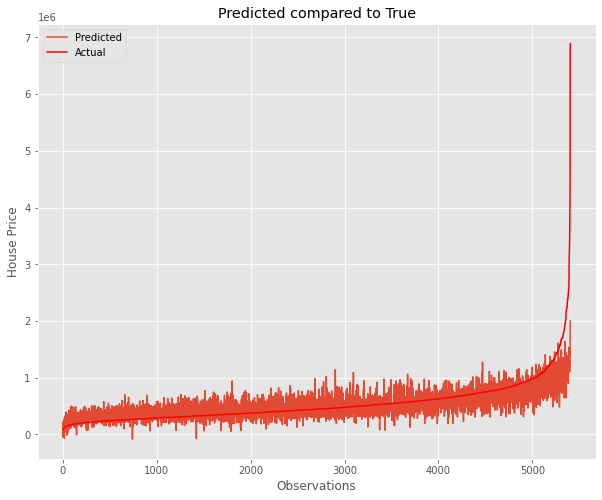

In [127]:
# Observations sorted by y_test values
# higher indices means higher HousePrice
d_obs = pd.DataFrame({'y_test':df_test['Price'],'y_pred': pred})
d_obs.sort_values(by=['y_test'],inplace=True)

# Plot the y_test and the prediction (pred)
fig = plt.figure(figsize=(10, 8))
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_pred'], markersize=10, label='Predicted')
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_test'],'r-',markersize=10, label='Actual', alpha=1)
plt.ylabel('House Price')
plt.xlabel('Observations')
plt.title('Predicted compared to True')
plt.legend(loc='upper left')
plt.show()

The predictions here vary hence it shows instavility

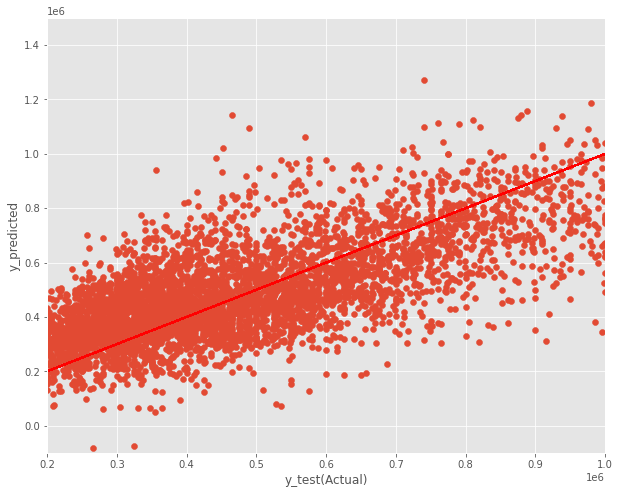

In [128]:
#Residuals
fig = plt.figure(figsize=(10, 8))
plt.scatter(y_test, pred)
plt.ylim(-100000, 1500000)
plt.xlim(200000, 1000000)
plt.plot(y_test, y_test, "r")
plt.xlabel('y_test(Actual)')
plt.ylabel('y_predicted');





> Residuals are distributed across testing sample



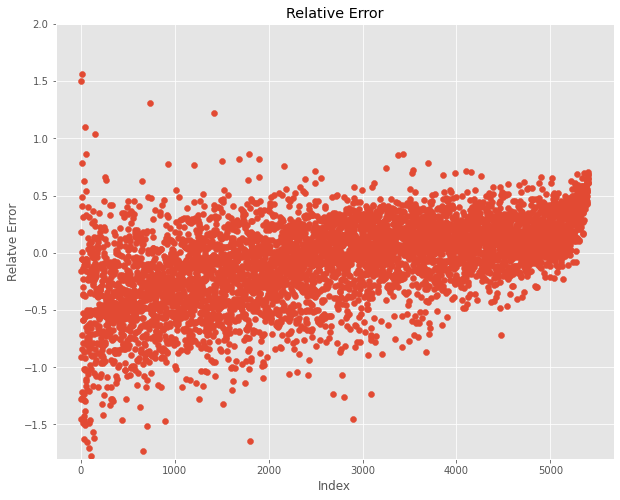

In [129]:
#Relative Error Plot
# Relatve Error = (y_test - predicted)/y_test
fig = plt.figure(figsize=(10, 8))
plt.scatter(np.arange(0,len(d_obs),1), (d_obs['y_test'] - d_obs['y_pred'])/d_obs['y_test'] )
plt.ylim(-1.8,2.0)
plt.ylabel('Relatve Error')
plt.xlabel('Index')
plt.title('Relative Error');
#Observations were sorted by y_test values meaning higher indices mean higher House Price

In [130]:
# Showing the RMSE, MSE & R-squared
from sklearn.metrics import mean_squared_error, r2_score

print('Accuracy on Testing Sample:')
print('MSE       = %f' % (mean_squared_error(y_test, pred)))
print('RMSE       = %f' % (np.sqrt(mean_squared_error(y_test, pred))))
print('R-Squared   = %f' % (r2_score(y_test, pred)))

Accuracy on Testing Sample:
MSE       = 59260482063.009758
RMSE       = 243434.759357
R-Squared   = 0.554484




> The rsquared here is 55.4% whis is better than that of Multiple linear regression at 62.4%



**4.3 Ridge Regression**

In [131]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 147354.04349334282
MSE: 53030186042.00278
RMSE: 230282.8392260326
R2 Square 0.6013233421535789
__________________________________
Train set evaluation:
_____________________________________
MAE: 148637.5629663162
MSE: 51202612149.21125
RMSE: 226279.94199489104
R2 Square 0.6223501440883945
__________________________________


In [132]:
#Let's evaluate the model by checking out it's coefficients and how we can interpret them.

# print the intercept
print(model.intercept_)

#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df1 = pd.DataFrame()
coeff_df1['Features']= x_train.columns
coeff_df1['coefficients'] = pd.Series(model.coef_)
coeff_df1

541845.1166018863


,Features,coefficients
0,bedrooms,-27829.608713
1,bathrooms,-10607.654463
2,sqft_living,86617.069834
3,sqft_lot,3911.200664
4,floors,-2367.855371
5,waterfront,54239.302189
6,view,37972.491360
7,condition,39293.789165
8,grade,114870.864150
9,sqft_above,70871.463369


In [133]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,151047.103439,5.565699e+10,235917.336391,0.603466,0.612248
1,Ridge Regression,147354.043493,5.303019e+10,230282.839226,0.601323,0.612258


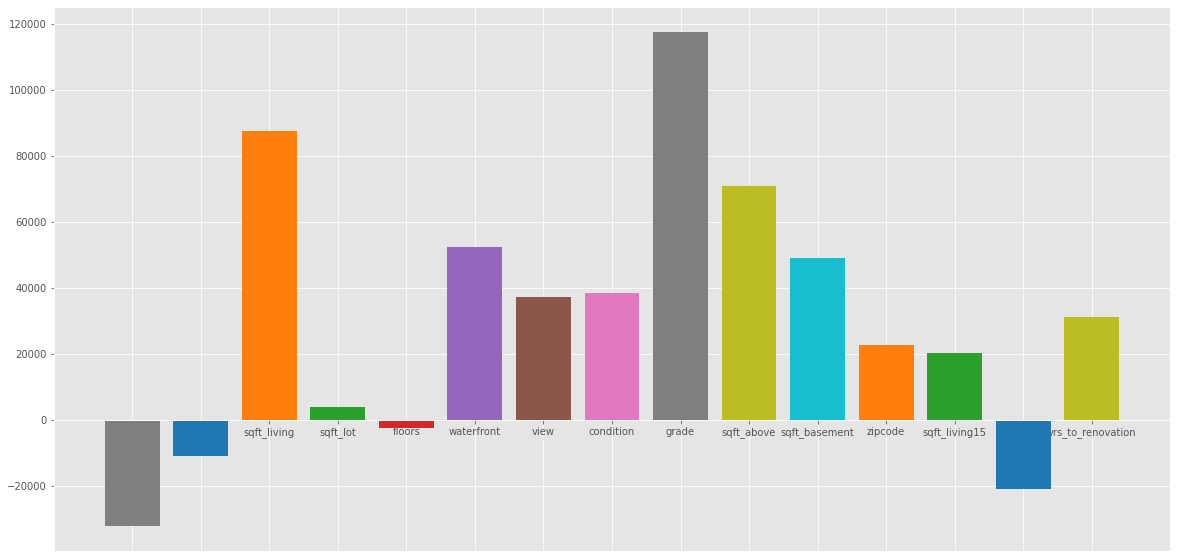

In [134]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(coeff_df1['Features'],
coeff_df['coefficients'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

As you can see from the coefficients, Holding all other features fixed, 1 unit increase in bedrooms is associated with a decrease of-27829.608713  in price which is an improvemnert from linear regression. This can be applied to all other features

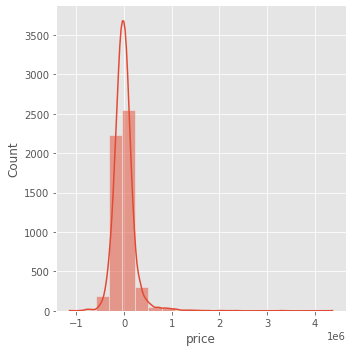

In [135]:
#Residual Plot distribution
pred = model.predict(X_test)
sns.displot((y_test-pred), bins = 20, kde = True)
plt.show()

You can observe the residual difference with the linear model. Meaning our model is improving

**4.4 Lasso Regression**

In [136]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model2.fit(X_train, y_train)

test_pred = model2.predict(X_test)
train_pred = model2.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 148774.28574854796
MSE: 54070649719.75068
RMSE: 232530.96507723586
R2 Square 0.5935012202148291
__________________________________
Train set evaluation:
_____________________________________
MAE: 150094.7526379724
MSE: 52023507933.3931
RMSE: 228086.62374938407
R2 Square 0.6162955472308884
__________________________________


In [137]:
#Let's evaluate the model by checking out it's coefficients and how we can interpret them.

# print the intercept
print(model2.intercept_)

#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df2 = pd.DataFrame()
coeff_df2['Features']= x_train.columns
coeff_df2['coefficients'] = pd.Series(model2.coef_)
coeff_df2

541845.1166018861


,Features,coefficients
0,bedrooms,0.000000
1,bathrooms,0.000000
2,sqft_living,43425.155653
3,sqft_lot,0.000000
4,floors,0.000000
5,waterfront,55752.845166
6,view,39216.995025
7,condition,39190.226846
8,grade,118759.191400
9,sqft_above,81945.807428




> As you can see, Lasso has reduced most of coefficient that were not strong to zero to regularize the model. This can easily be visualised by the plot below



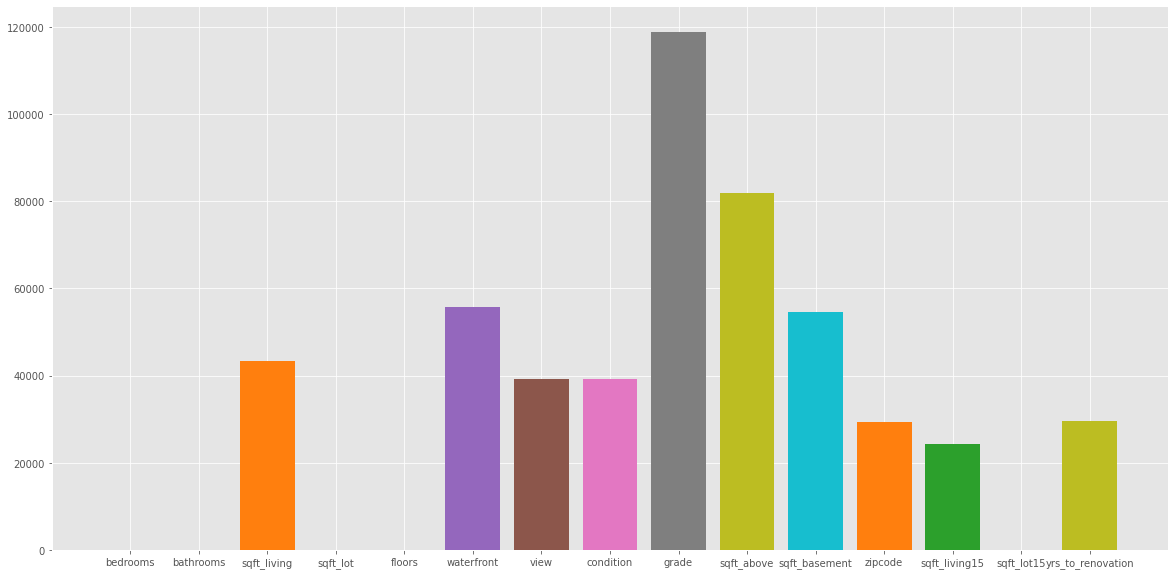

In [138]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(coeff_df2['Features'],
coeff_df2['coefficients'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()



> All negative coefficients have been eliminated by Lasso because they had less influence on our output.



In [139]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+14, tolerance: 2.603e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.496e+14, tolerance: 2.574e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,151047.103439,5.565699e+10,235917.336391,0.603466,0.612248
1,Ridge Regression,147354.043493,5.303019e+10,230282.839226,0.601323,0.612258
2,Lasso Regression,148774.285749,5.407065e+10,232530.965077,0.593501,0.612248


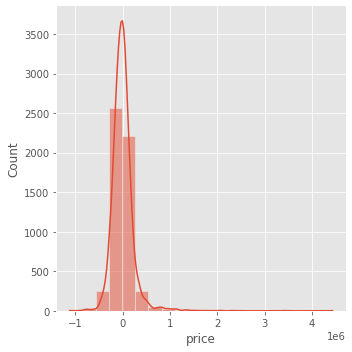

In [140]:
#Residual Plot distribution
pred = model2.predict(X_test)
sns.displot((y_test-pred), bins = 20, kde = True)
plt.show()

**4.5 ElasticNet Regression**

In [141]:
from sklearn.linear_model import ElasticNet

model3 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model3.fit(X_train, y_train)

test_pred = model3.predict(X_test)
train_pred = model3.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 147308.1374609815
MSE: 53038830273.972755
RMSE: 230301.6071892959
R2 Square 0.601258355515427
__________________________________
Train set evaluation:
_____________________________________
MAE: 148584.77870738806
MSE: 51205758289.654686
RMSE: 226286.89376465153
R2 Square 0.6223269394229435
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.644e+12, tolerance: 2.198e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [142]:
#Let's evaluate the model by checking out it's coefficients and how we can interpret them.

# print the intercept
print(model3.intercept_)

#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df3 = pd.DataFrame()
coeff_df3['Features']= x_train.columns
coeff_df3['coefficients'] = pd.Series(model3.coef_)
coeff_df3

541845.1166018863


,Features,coefficients
0,bedrooms,-27508.702041
1,bathrooms,-9927.594738
2,sqft_living,86142.278893
3,sqft_lot,3829.461234
4,floors,-2248.626183
5,waterfront,54079.809511
6,view,38057.287556
7,condition,39126.780248
8,grade,114072.413078
9,sqft_above,70452.219289




> Now this model is using both powers of  ridge and Lasso to avoid bias and get best Variance.



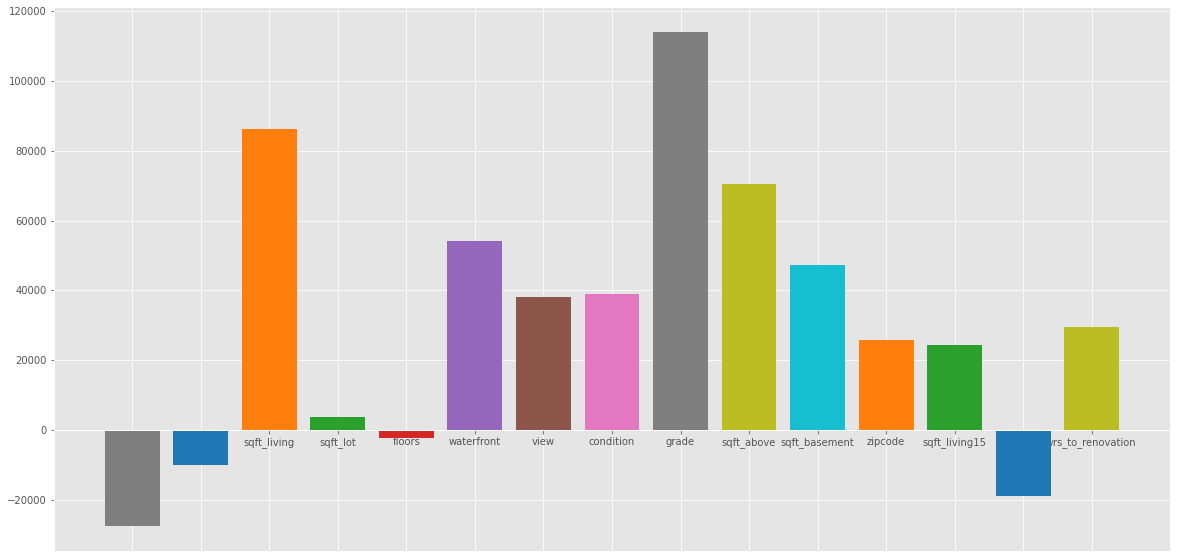

In [143]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(coeff_df3['Features'],
coeff_df3['coefficients'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

In [144]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.667e+14, tolerance: 2.603e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.621e+14, tolerance: 2.574e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,151047.103439,5.565699e+10,235917.336391,0.603466,0.612248
1,Ridge Regression,147354.043493,5.303019e+10,230282.839226,0.601323,0.612258
2,Lasso Regression,148774.285749,5.407065e+10,232530.965077,0.593501,0.612248
3,Elastic Net Regression,147308.137461,5.303883e+10,230301.607189,0.601258,0.579030


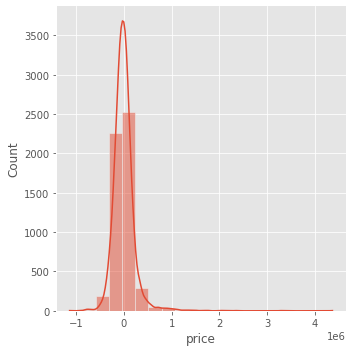

In [146]:
#Residual Plot distribution
pred = model3.predict(X_test)
sns.displot((y_test-pred), bins = 20, kde = True)
plt.show()

##**5.0 Evaluation**

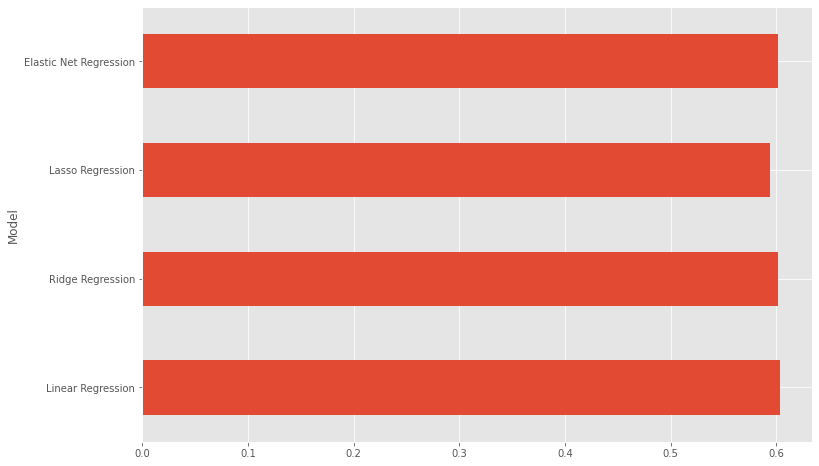

In [145]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

Here, we can say that Lasso model provided the best model as compared to Ridge, MlR, ElasticNet and Quantiles with rsquared of 59.3.